In [1]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib as plt

import warnings

warnings.filterwarnings('ignore')

from IPython import display

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

## Data Collection :

In [2]:
df = pd.read_csv('lebron_career (4).csv')
df.head()

game        date     age team  opp   result  mp  fg  fga    fgp  three  \
0     1  2003-10-29  18-303  CLE  SAC  L (-14)  42  12   20  0.600      0   
1     2  2003-10-30  18-304  CLE  PHO   L (-9)  41   8   17  0.471      1   
2     3  2003-11-01  18-306  CLE  POR  L (-19)  39   3   12  0.250      0   
3     4  2003-11-05  18-310  CLE  DEN   L (-4)  41   3   11  0.273      0   
4     5  2003-11-07  18-312  CLE  IND   L (-1)  44   8   18  0.444      1   

   threeatt  threep  ft  fta    ftp  orb  drb  trb  ast  stl  blk  tov  pts  \
0         2     0.0   1    3  0.333    2    4    6    9    4    0    2   25   
1         5     0.2   4    7  0.571    2   10   12    8    1    0    7   21   
2         1     0.0   2    2  1.000    0    4    4    6    2    0    2    8   
3         2     0.0   1    1  1.000    2    9   11    7    2    3    2    7   
4         2     0.5   6    7  0.857    0    5    5    3    0    0    7   23   

   game_score  plus_minus  
0        24.7          -9  
1        14.7          -3  
2         5.0         -21  
3        11.2          -3  
4         9.0          -7

## Data Preprocessing :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game        1265 non-null   int64  
 1   date        1265 non-null   object 
 2   age         1265 non-null   object 
 3   team        1265 non-null   object 
 4   opp         1265 non-null   object 
 5   result      1265 non-null   object 
 6   mp          1265 non-null   int64  
 7   fg          1265 non-null   int64  
 8   fga         1265 non-null   int64  
 9   fgp         1265 non-null   float64
 10  three       1265 non-null   int64  
 11  threeatt    1265 non-null   int64  
 12  threep      1225 non-null   float64
 13  ft          1265 non-null   int64  
 14  fta         1265 non-null   int64  
 15  ftp         1251 non-null   float64
 16  orb         1265 non-null   int64  
 17  drb         1265 non-null   int64  
 18  trb         1265 non-null   int64  
 19  ast         1265 non-null  

In [4]:
df.describe()

game           mp           fg          fga          fgp  \
count  1265.000000  1265.000000  1265.000000  1265.000000  1265.000000   
mean     38.037154    38.395257     9.866403    19.589723     0.504983   
std      22.000418     5.173445     3.070431     4.780305     0.112042   
min       1.000000    11.000000     0.000000     5.000000     0.000000   
25%      19.000000    35.000000     8.000000    16.000000     0.429000   
50%      38.000000    39.000000    10.000000    20.000000     0.500000   
75%      56.000000    42.000000    12.000000    23.000000     0.579000   
max      82.000000    55.000000    23.000000    36.000000     0.929000   

             three     threeatt       threep           ft          fta  \
count  1265.000000  1265.000000  1225.000000  1265.000000  1265.000000   
mean      1.482213     4.310672     0.310532     5.852964     7.969960   
std       1.424761     2.404325     0.247283     3.424208     4.179219   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.000000     0.000000     3.000000     5.000000   
50%       1.000000     4.000000     0.333000     5.000000     8.000000   
75%       2.000000     6.000000     0.500000     8.000000    11.000000   
max       8.000000    13.000000     1.000000    24.000000    28.000000   

               ftp          orb          drb          trb          ast  \
count  1251.000000  1265.000000  1265.000000  1265.000000  1265.000000   
mean      0.728335     1.192885     6.241897     7.434783     7.388142   
std       0.190140     1.167511     2.718022     3.024278     3.013475   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.615000     0.000000     4.000000     5.000000     5.000000   
50%       0.750000     1.000000     6.000000     7.000000     7.000000   
75%       0.857000     2.000000     8.000000     9.000000     9.000000   
max       1.000000     7.000000    17.000000    19.000000    19.000000   

               stl          blk          tov          pts   game_score  \
count  1265.000000  1265.000000  1265.000000  1265.000000  1265.000000   
mean      1.592885     0.756522     3.497233    27.067984    22.224585   
std       1.295481     0.904896     1.830266     7.817750     7.727079   
min       0.000000     0.000000     0.000000     3.000000    -0.100000   
25%       1.000000     0.000000     2.000000    22.000000    17.000000   
50%       1.000000     1.000000     3.000000    27.000000    22.600000   
75%       2.000000     1.000000     5.000000    32.000000    27.200000   
max       7.000000     5.000000    11.000000    61.000000    53.200000   

        plus_minus  
count  1265.000000  
mean      5.410277  
std      12.692632  
min     -39.000000  
25%      -3.000000  
50%       6.000000  
75%      14.000000  
max      39.000000

In [5]:
df.nunique()

game            82
date          1265
age           1265
team             3
opp             35
result          73
mp              37
fg              21
fga             30
fgp            148
three            9
threeatt        14
threep          34
ft              21
fta             25
ftp             72
orb              8
drb             17
trb             20
ast             19
stl              8
blk              6
tov             12
pts             52
game_score     335
plus_minus      72
dtype: int64

In [6]:
df.shape

(1265, 26)

In [7]:
df.axes

[RangeIndex(start=0, stop=1265, step=1),
 Index(['game', 'date', 'age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
        'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
        'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'plus_minus'],
       dtype='object')]

In [8]:
df.columns

Index(['game', 'date', 'age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
       'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'plus_minus'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=1265, step=1)

In [10]:
df.dtypes

game            int64
date           object
age            object
team           object
opp            object
result         object
mp              int64
fg              int64
fga             int64
fgp           float64
three           int64
threeatt        int64
threep        float64
ft              int64
fta             int64
ftp           float64
orb             int64
drb             int64
trb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pts             int64
game_score    float64
plus_minus      int64
dtype: object

In [11]:
df.isna().sum()

game           0
date           0
age            0
team           0
opp            0
result         0
mp             0
fg             0
fga            0
fgp            0
three          0
threeatt       0
threep        40
ft             0
fta            0
ftp           14
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
tov            0
pts            0
game_score     0
plus_minus     0
dtype: int64

In [12]:
df.fillna(88888,inplace =True)

In [13]:
df.isna().sum()

game          0
date          0
age           0
team          0
opp           0
result        0
mp            0
fg            0
fga           0
fgp           0
three         0
threeatt      0
threep        0
ft            0
fta           0
ftp           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pts           0
game_score    0
plus_minus    0
dtype: int64

## Data Visualization  :

<Axes: ylabel='Count'>

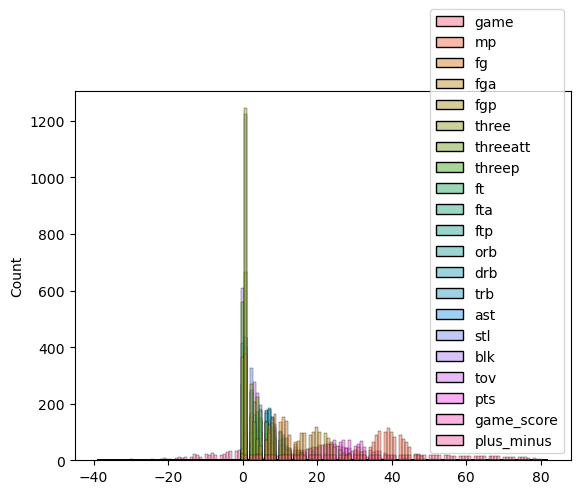

In [12]:
sns.histplot(df)

<Axes: >

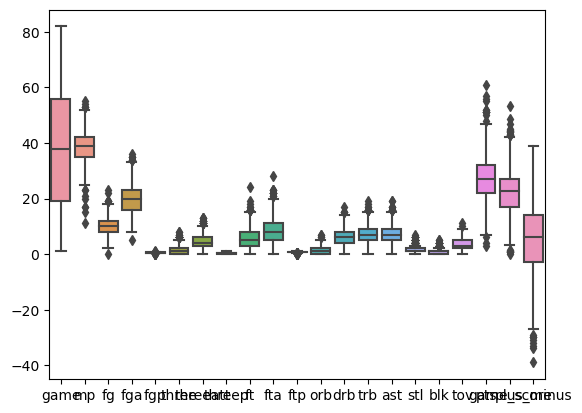

In [4]:
sns.boxplot(df)

<Axes: ylabel='count'>

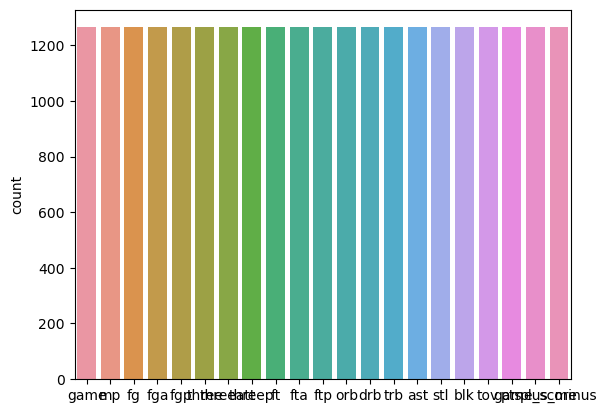

In [5]:
sns.countplot(df)

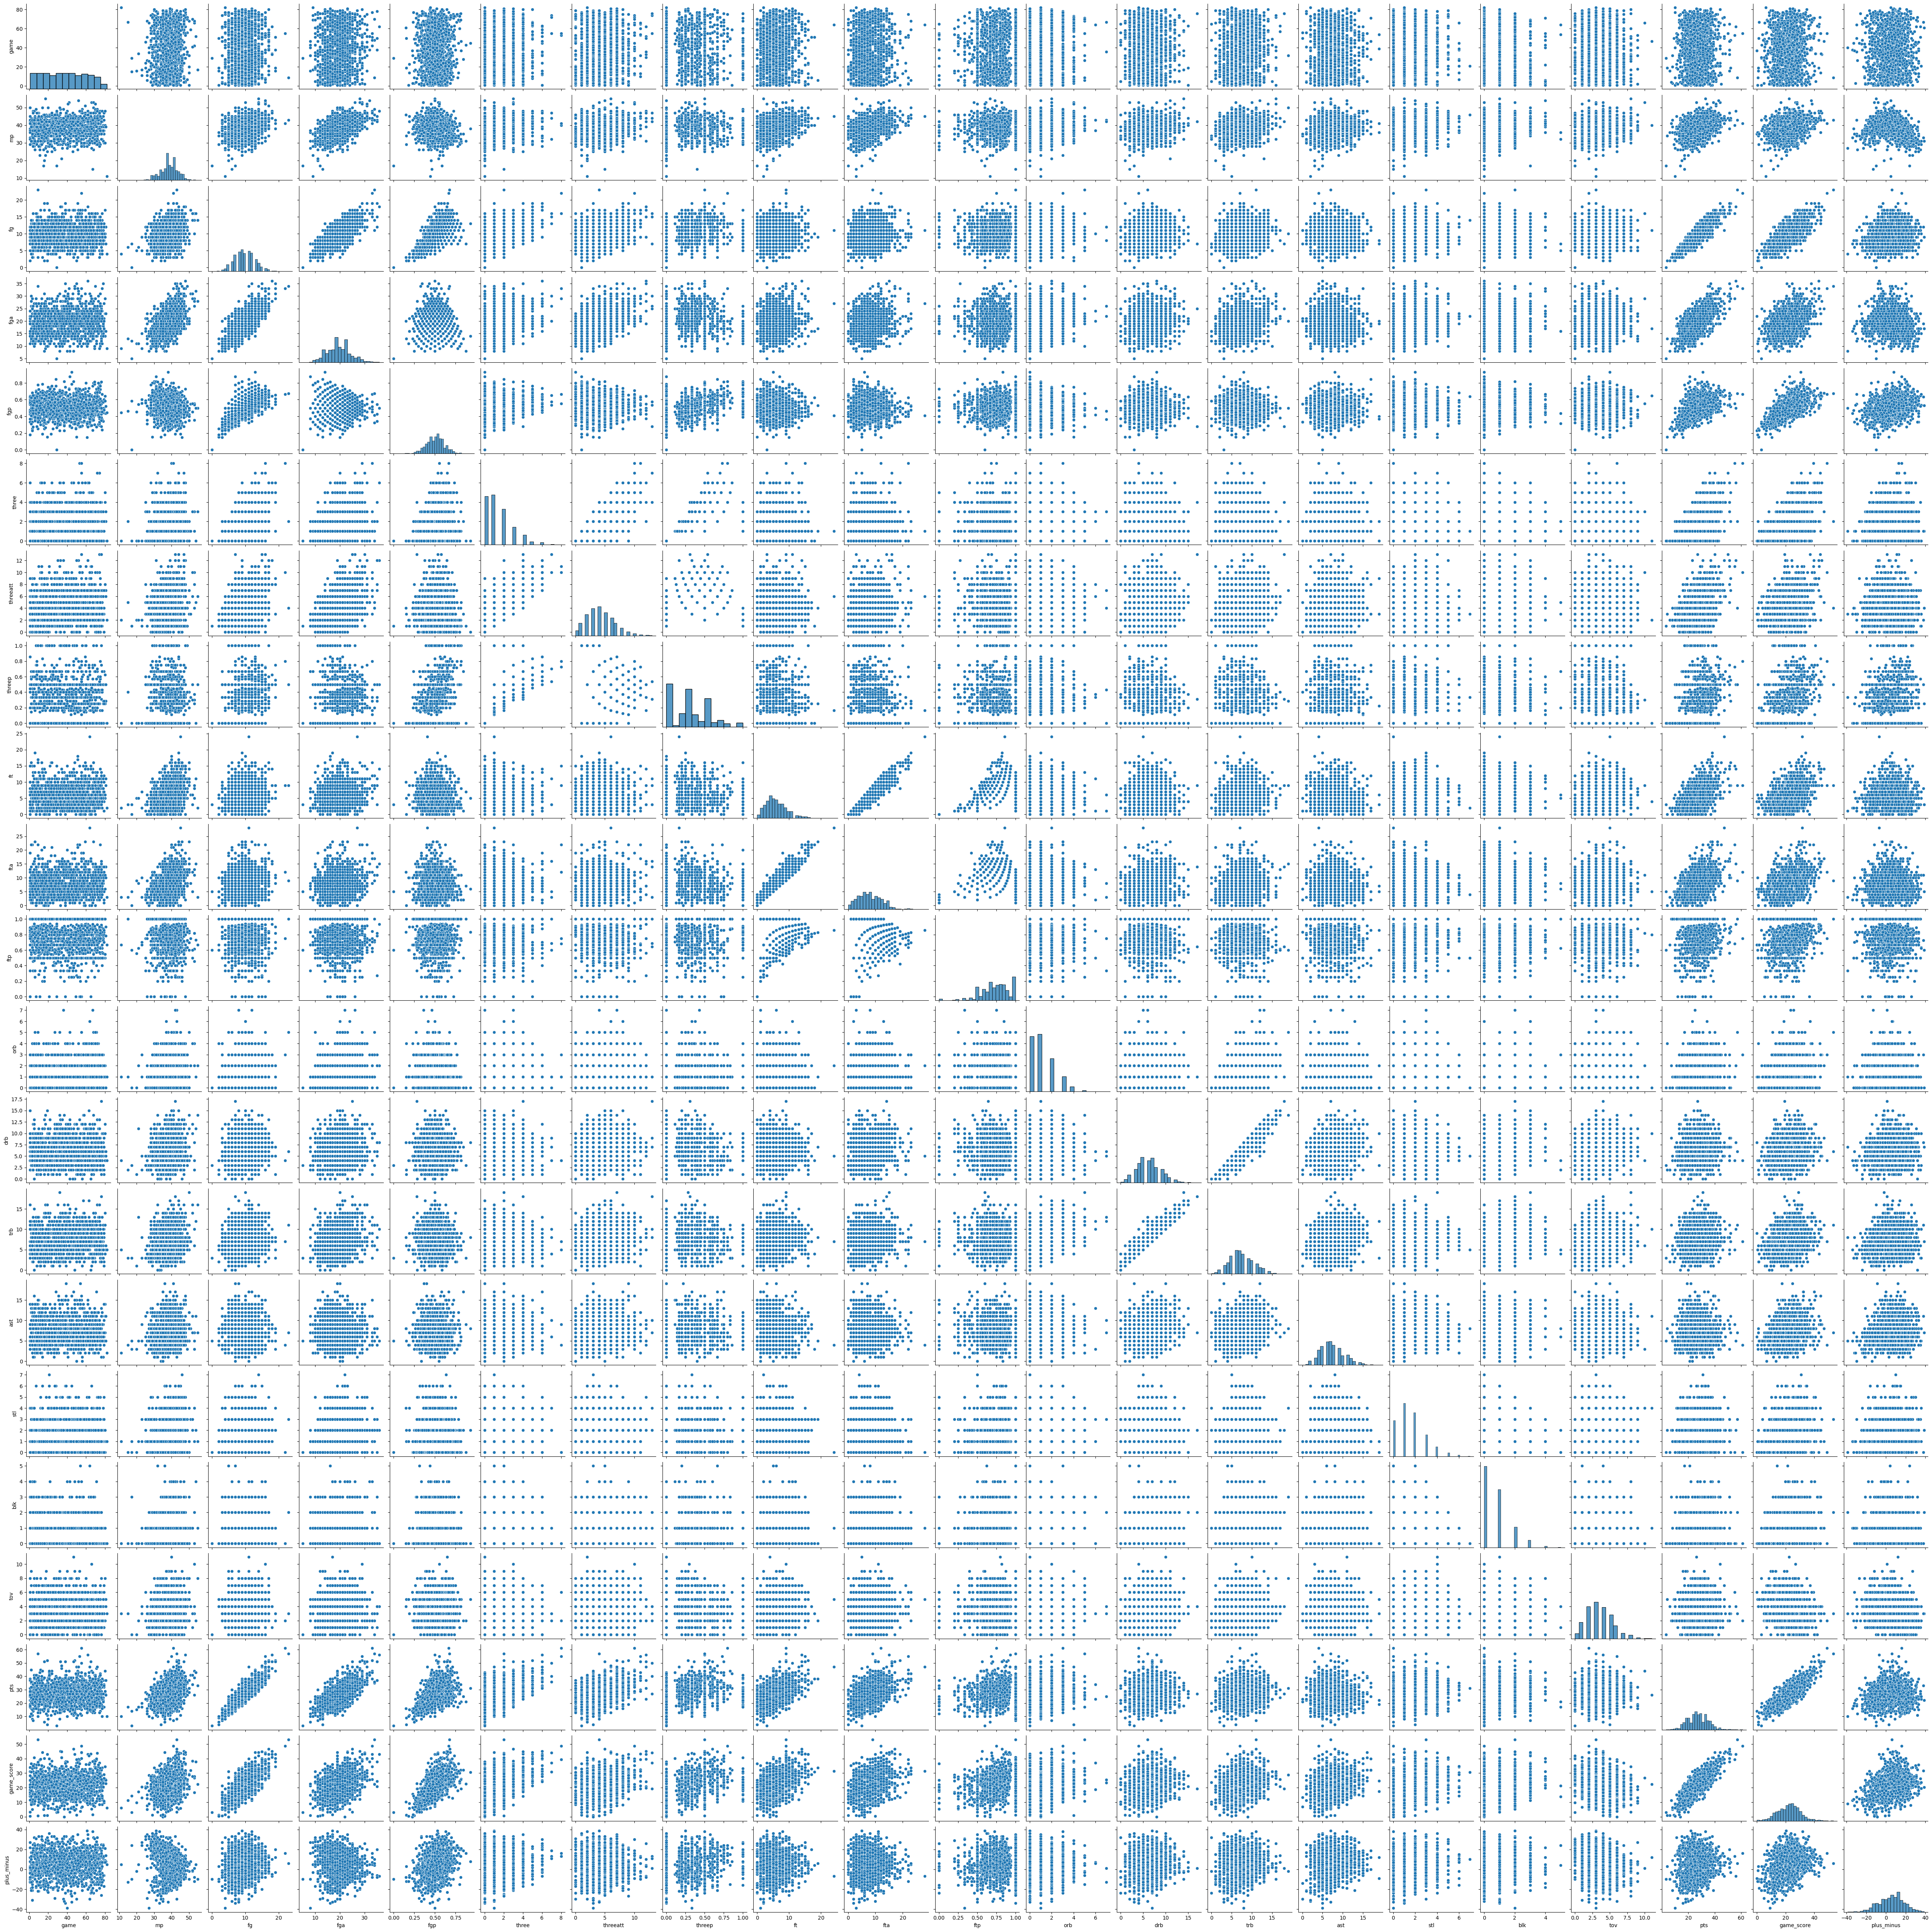

In [11]:
sns.pairplot(df)

<Axes: xlabel='orb', ylabel='Density'>

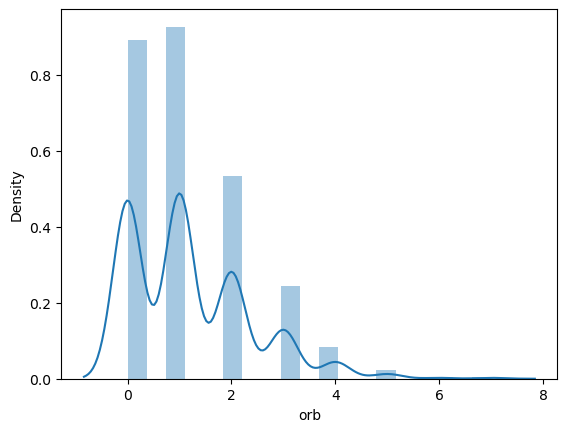

In [7]:
sns.distplot(df['orb'])

## Comparing Numerical Features with Categorical Features :

In [8]:
df.select_dtypes(include = 'object').head()

date     age team  opp   result
0  2003-10-29  18-303  CLE  SAC  L (-14)
1  2003-10-30  18-304  CLE  PHO   L (-9)
2  2003-11-01  18-306  CLE  POR  L (-19)
3  2003-11-05  18-310  CLE  DEN   L (-4)
4  2003-11-07  18-312  CLE  IND   L (-1)

In [9]:
df.select_dtypes(exclude = 'object').head()

game  mp  fg  fga    fgp  three  threeatt  threep  ft  fta    ftp  orb  \
0     1  42  12   20  0.600      0         2     0.0   1    3  0.333    2   
1     2  41   8   17  0.471      1         5     0.2   4    7  0.571    2   
2     3  39   3   12  0.250      0         1     0.0   2    2  1.000    0   
3     4  41   3   11  0.273      0         2     0.0   1    1  1.000    2   
4     5  44   8   18  0.444      1         2     0.5   6    7  0.857    0   

   drb  trb  ast  stl  blk  tov  pts  game_score  plus_minus  
0    4    6    9    4    0    2   25        24.7          -9  
1   10   12    8    1    0    7   21        14.7          -3  
2    4    4    6    2    0    2    8         5.0         -21  
3    9   11    7    2    3    2    7        11.2          -3  
4    5    5    3    0    0    7   23         9.0          -7

## using groupby :

In [13]:
df.groupby('orb').first().head()

game        date     age team  opp   result  mp  fg  fga    fgp  three  \
orb                                                                           
0       3  2003-11-01  18-306  CLE  POR  L (-19)  39   3   12  0.250      0   
1       7  2003-11-10  18-315  CLE  NYK  W (+14)  34   7   12  0.583      3   
2       1  2003-10-29  18-303  CLE  SAC  L (-14)  42  12   20  0.600      0   
3      18  2003-12-02  18-337  CLE  DEN  L (-12)  32   6   19  0.316      2   
4      19  2003-12-03  18-338  CLE  LAC  L (-10)  34   2   13  0.154      0   

     threeatt  threep  ft  fta    ftp  drb  trb  ast  stl  blk  tov  pts  \
orb                                                                        
0           1   0.000   2    2  1.000    4    4    6    2    0    2    8   
1           3   1.000   0    0  0.667    4    5    4    1    1    2   17   
2           2   0.000   1    3  0.333    4    6    9    4    0    2   25   
3           3   0.667   5    7  0.714    3    6    5    2    0    2   19   
4           3   0.000   0    0  0.833    2    6    8    2    0    5    4   

     game_score  plus_minus  
orb                          
0           5.0         -21  
1          15.8          20  
2          24.7          -9  
3          12.2         -12  
4           0.9           3

## Compairing two features :

In [14]:
pd.crosstab(df['orb'],df['stl']).head()

stl   0    1    2   3   4   5  6  7
orb                                
0    99  135  104  52  20   5  0  1
1    79  138  119  48  27  15  6  0
2    54   83   55  33  17   5  2  0
3    30   25   32  21   5   0  1  0
4     7   14   13   2   2   1  0  0

## Handling Outliers :

In [10]:
import matplotlib.pyplot as plt

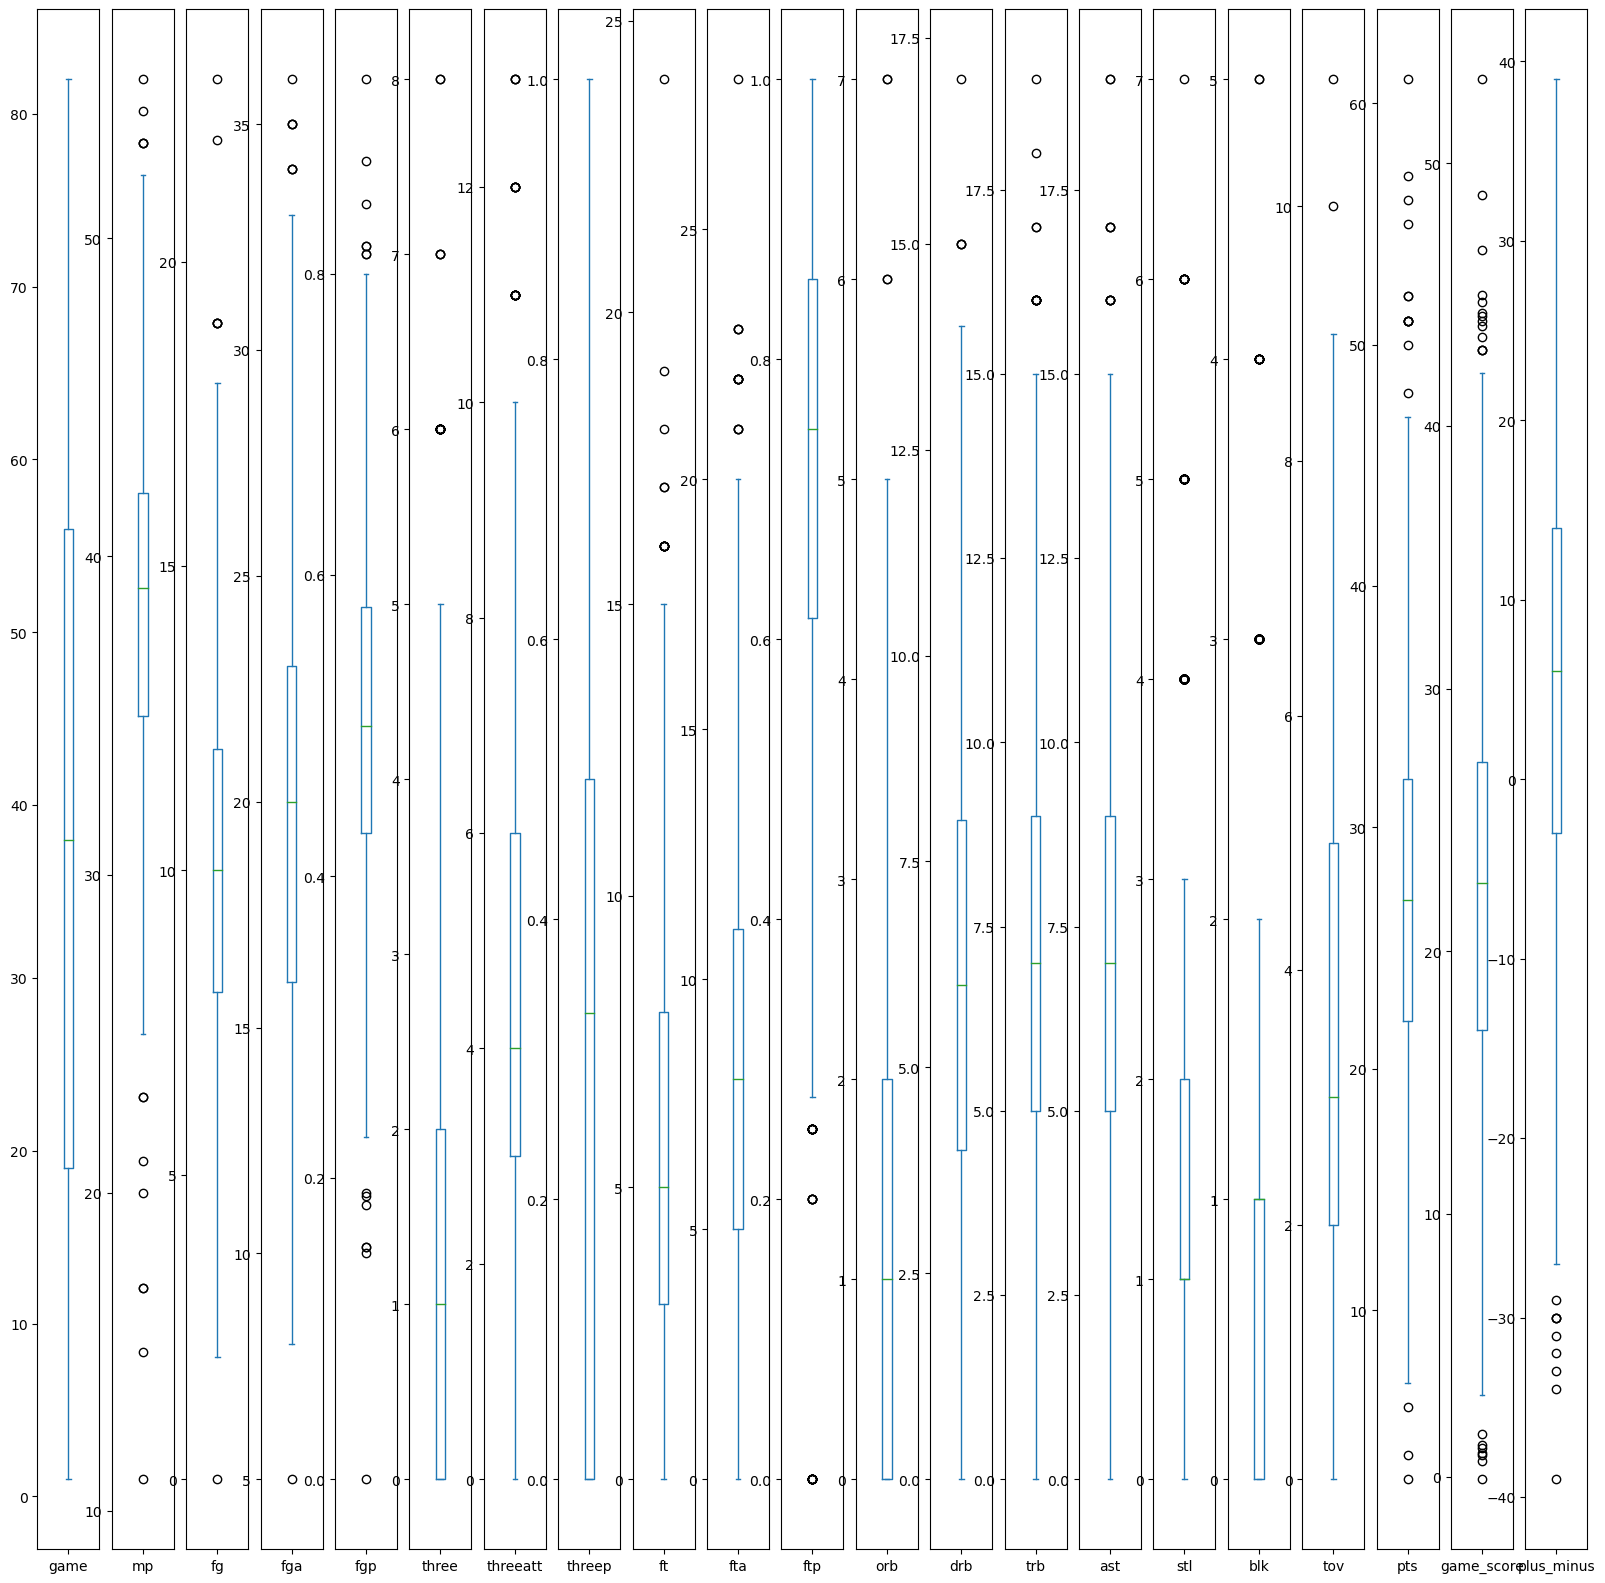

In [13]:
df.plot(kind = 'box',subplots = True,figsize = (20,20))

plt.show()

<Axes: >

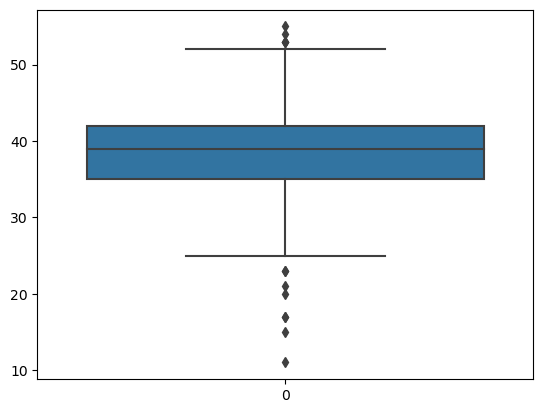

In [18]:
sns.boxplot(df['mp'])

In [20]:
q1 = df['mp'].quantile(0.25)
q2 = df['mp'].quantile(0.50)
q3 = df['mp'].quantile(0.75)

IQR = q3 - q1
med = df['mp'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


35.0
39.0
42.0
39.0
52.5
24.5


In [22]:
df['mp'].loc[df['mp']>upper_tail]

16     55
144    53
146    53
210    54
279    53
Name: mp, dtype: int64

In [23]:
df['mp'].loc[df['mp']>upper_tail]=upper_tail

In [24]:
df['mp'].loc[df['mp']>upper_tail]

Series([], Name: mp, dtype: float64)

In [ ]:
df['mp'].loc[df['mp']<lower_tail]

In [25]:
df['mp'].loc[df['mp']<lower_tail]=lower_tail

In [26]:
df['mp'].loc[df['mp']<lower_tail]

Series([], Name: mp, dtype: float64)

<Axes: >

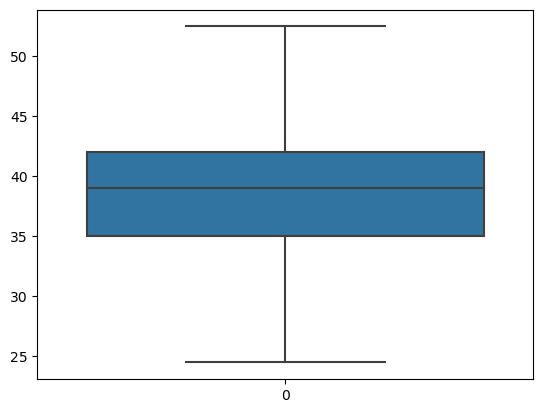

In [27]:
sns.boxplot(df['mp'])

<Axes: >

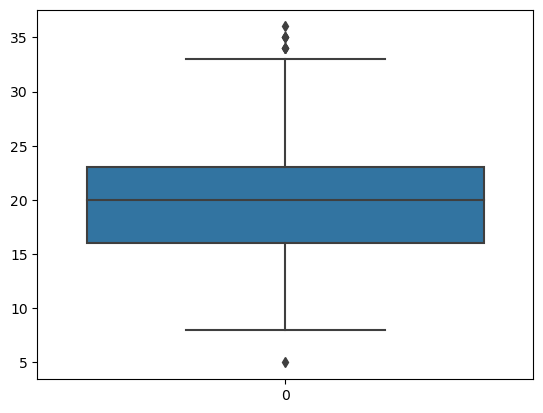

In [16]:
sns.boxplot(df['fga'])

In [ ]:
q1 = df['fga'].quantile(0.25)
q2 = df['fga'].quantile(0.50)
q3 = df['fga'].quantile(0.75)

IQR = q3 - q1
med = df['fga'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


In [ ]:
sns.boxplot(df['fgp'])

In [ ]:
q1 = df['fga'].quantile(0.25)
q2 = df['fga'].quantile(0.50)
q3 = df['fga'].quantile(0.75)

IQR = q3 - q1
med = df['fga'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


In [ ]:
sns.boxplot(df['three'])

In [ ]:
q1 = df['fga'].quantile(0.25)
q2 = df['fga'].quantile(0.50)
q3 = df['fga'].quantile(0.75)

IQR = q3 - q1
med = df['fga'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


In [ ]:
sns.boxplot(df['three'])

In [ ]:
q1 = df['three'].quantile(0.25)
q2 = df['three'].quantile(0.50)
q3 = df['three'].quantile(0.75)

IQR = q3 - q1
med = df['three'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


In [ ]:
sns.boxplot(df['three'])

In [29]:
q1 = df['three'].quantile(0.25)
q2 = df['three'].quantile(0.50)
q3 = df['three'].quantile(0.75)

IQR = q3 - q1
med = df['three'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


0.0
1.0
2.0
1.0
5.0
-3.0


<Axes: >

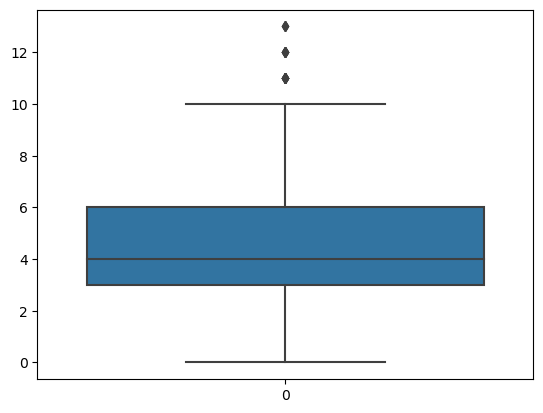

In [30]:
sns.boxplot(df['threeatt'])

In [28]:
q1 = df['threeatt'].quantile(0.25)
q2 = df['threeatt'].quantile(0.50)
q3 = df['threeatt'].quantile(0.75)

IQR = q3 - q1
med = df['threeatt'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


3.0
4.0
6.0
4.0
10.5
-1.5


In [31]:
df['threeatt'].loc[df['threeatt']>upper_tail]

16       6
25       7
27       6
28      10
42       6
48       6
114      7
119      6
124      6
132      7
135      6
138      9
140     12
141      7
144     10
145      8
148      8
149      6
151      6
152     13
153      6
154     13
155      6
156      7
158      8
159      7
161      9
171     11
177      9
178      6
182      6
187      8
188      7
189      7
190      7
192      8
194      6
196      8
200      7
201      6
204      7
205      7
208      6
213      8
219      6
221      6
222      6
224      6
227      8
229      7
230      6
232     10
233      7
241      8
245      6
249      7
254      6
265      6
271      7
272      9
274      7
277      7
279      8
280      6
281      7
295      6
297      6
298      6
299      7
300      6
301      9
302      6
304      6
313      6
326      7
327     10
328      8
329      6
330      8
333      9
336      6
343      6
344      8
347      7
348     12
354      6
356      8
362      7
364      6
367      6
370     13

In [32]:
df['threeatt'].loc[df['threeatt']>upper_tail] = upper_tail

In [33]:
df['threeatt'].loc[df['threeatt']>upper_tail]

Series([], Name: threeatt, dtype: int64)

<Axes: >

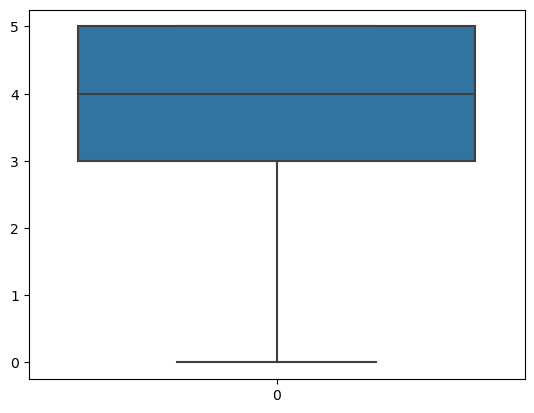

In [34]:
sns.boxplot(df['threeatt'])

<Axes: >

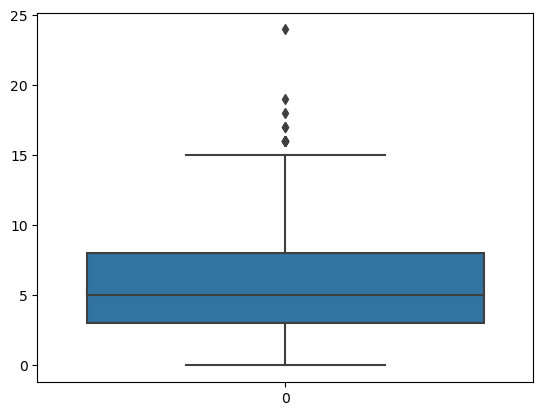

In [35]:
sns.boxplot(df['ft'])

In [36]:
q1 = df['ft'].quantile(0.25)
q2 = df['ft'].quantile(0.50)
q3 = df['ft'].quantile(0.75)

IQR = q3 - q1
med = df['ft'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


3.0
5.0
8.0
5.0
15.5
-4.5


In [37]:
df['ft'].loc[df['ft'] > upper_tail]

22     16
222    24
226    16
243    19
250    16
261    16
288    18
317    16
374    16
438    16
480    16
522    17
556    17
Name: ft, dtype: int64

In [38]:
df['ft'].loc[df['ft'] > upper_tail] = upper_tail

In [39]:
df['ft'].loc[df['ft'] > upper_tail]

Series([], Name: ft, dtype: float64)

<Axes: >

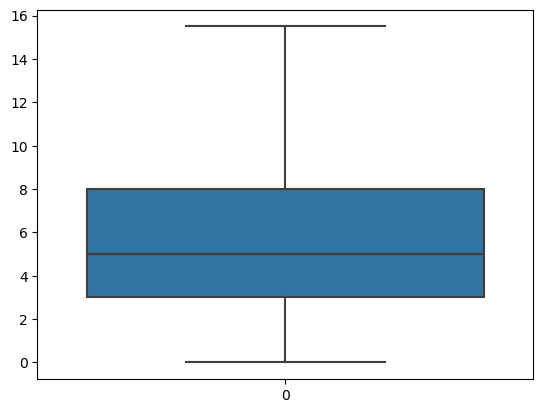

In [40]:
sns.boxplot(df['ft'])

<Axes: >

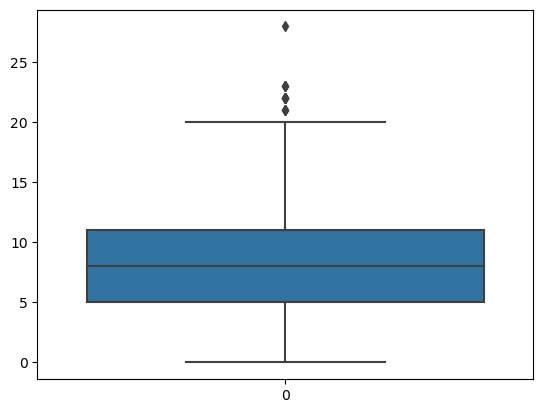

In [41]:
sns.boxplot(df['fta'])

In [42]:
q1 = df['fta'].quantile(0.25)
q2 = df['fta'].quantile(0.50)
q3 = df['fta'].quantile(0.75)

IQR = q3 - q1
med = df['fta'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


5.0
8.0
11.0
8.0
20.0
-4.0


In [43]:
df['fta'].loc[df['fta'] > upper_tail]

81     22
222    28
226    23
243    23
261    21
288    22
317    22
374    23
443    22
522    21
546    22
556    22
857    21
Name: fta, dtype: int64

In [44]:
df['fta'].loc[df['fta'] > upper_tail] = upper_tail

In [45]:
df['fta'].loc[df['fta'] > upper_tail]

Series([], Name: fta, dtype: int64)

<Axes: >

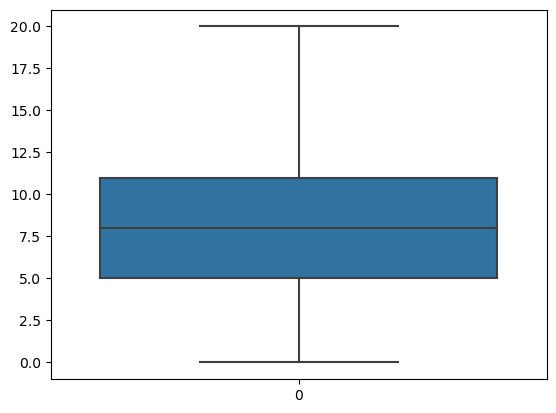

In [46]:
sns.boxplot(df['fta'])

<Axes: >

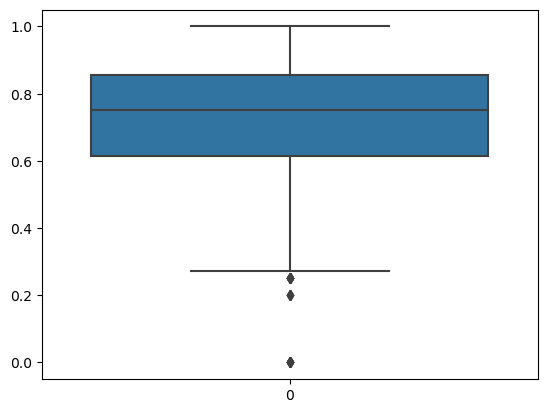

In [47]:
sns.boxplot(df['ftp'])

In [48]:
q1 = df['ftp'].quantile(0.25)
q2 = df['ftp'].quantile(0.50)
q3 = df['ftp'].quantile(0.75)

IQR = q3 - q1
med = df['ftp'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


0.615
0.75
0.857
0.75
1.22
0.252


In [53]:
df['ftp'].loc[df['ftp']<lower_tail]

5       0.25
46      0.25
116     0.00
248     0.00
266     0.00
290     0.25
596     0.00
602     0.00
609     0.25
642     0.25
680     0.20
695     0.00
721     0.25
730     0.25
911     0.00
924     0.20
1076    0.20
1081    0.00
1104    0.25
1113    0.00
1125    0.00
1129    0.25
1179    0.20
1196    0.00
1208    0.00
1242    0.25
1248    0.25
1257    0.20
Name: ftp, dtype: float64

In [54]:
df['ftp'].loc[df['ftp']<lower_tail] = lower_tail

In [55]:
df['ftp'].loc[df['ftp']<lower_tail]

Series([], Name: ftp, dtype: float64)

<Axes: >

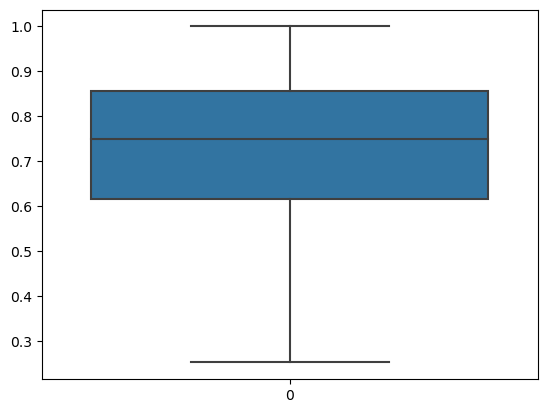

In [56]:
sns.boxplot(df['ftp'])

<Axes: >

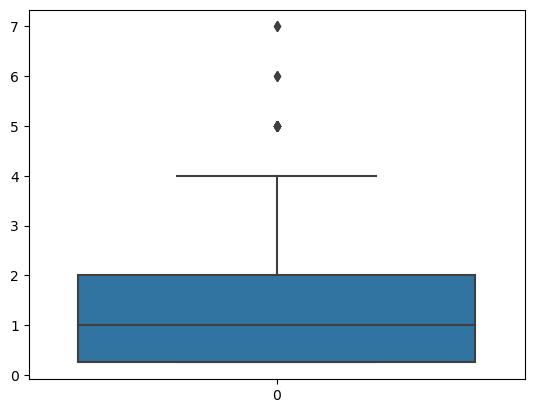

In [57]:
sns.boxplot(df['orb'])

In [58]:
q1 = df['orb'].quantile(0.25)
q2 = df['orb'].quantile(0.50)
q3 = df['orb'].quantile(0.75)

IQR = q3 - q1
med = df['orb'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


0.252
1.0
2.0
1.0
4.622
-2.37


In [59]:
df['orb'].loc[df['orb']>upper_tail]

5       5.0
87      5.0
347     5.0
386     5.0
433     5.0
454     6.0
662     7.0
681     5.0
755     7.0
974     6.0
978     5.0
1013    5.0
1041    5.0
1069    5.0
1130    5.0
Name: orb, dtype: float64

In [60]:
df['orb'].loc[df['orb']>upper_tail] = upper_tail

In [61]:
df['orb'].loc[df['orb']>upper_tail]

Series([], Name: orb, dtype: float64)

<Axes: >

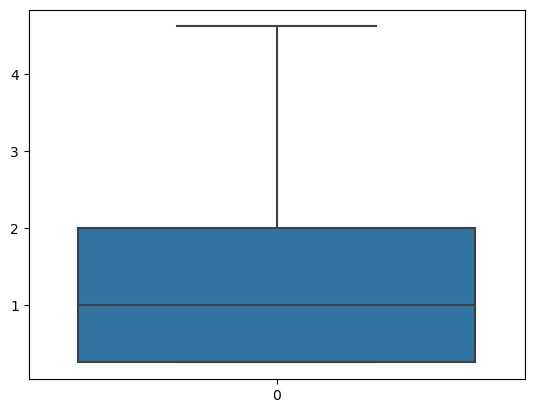

In [62]:
sns.boxplot(df['orb'])

<Axes: >

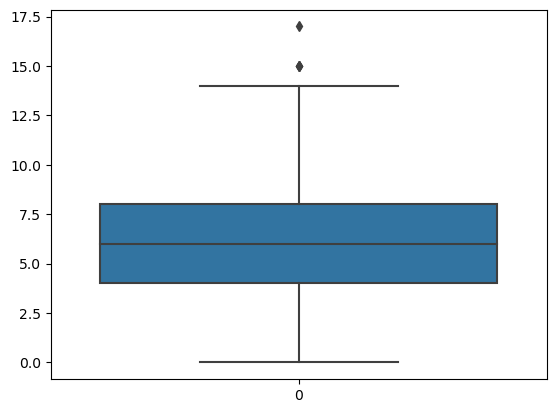

In [63]:
sns.boxplot(df['drb'])

In [64]:
q1 = df['drb'].quantile(0.25)
q2 = df['drb'].quantile(0.50)
q3 = df['drb'].quantile(0.75)

IQR = q3 - q1
med = df['drb'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


4.0
6.0
8.0
6.0
14.0
-2.0


In [65]:
df['drb'].loc[df['drb'] > upper_tail]

154     17
300     15
1061    15
1079    15
Name: drb, dtype: int64

In [66]:
df['drb'].loc[df['drb'] > upper_tail] = upper_tail

In [67]:
df['drb'].loc[df['drb'] > upper_tail]

Series([], Name: drb, dtype: int64)

<Axes: >

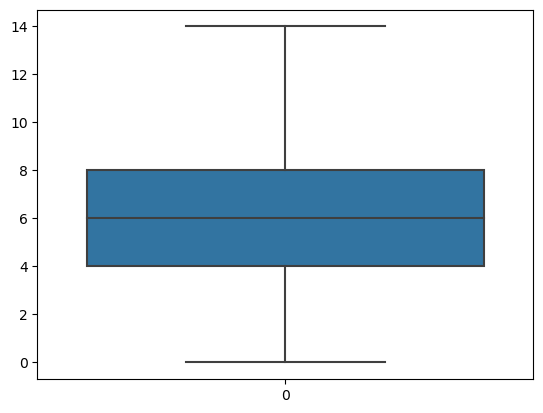

In [68]:
sns.boxplot(df['drb'])

In [ ]:
sns.boxplot(df['trb'])

In [23]:
q1 = df['trb'].quantile(0.25)
q2 = df['trb'].quantile(0.50)
q3 = df['trb'].quantile(0.75)

IQR = q3 - q1
med = df['trb'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


5.0
7.0
9.0
7.0
15.0
-1.0


In [ ]:
sns.boxplot(df['ast'])

In [22]:
q1 = df['ast'].quantile(0.25)
q2 = df['ast'].quantile(0.50)
q3 = df['ast'].quantile(0.75)

IQR = q3 - q1
med = df['ast'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


5.0
7.0
9.0
7.0
15.0
-1.0


<Axes: >

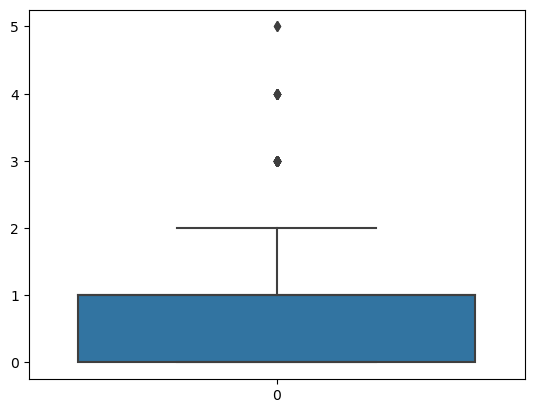

In [79]:
sns.boxplot(df['blk'])

In [80]:
q1 = df['blk'].quantile(0.25)
q2 = df['blk'].quantile(0.50)
q3 = df['blk'].quantile(0.75)

IQR = q3 - q1
med = df['blk'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


0.0
1.0
1.0
1.0
2.5
-1.5


In [81]:
df['blk'].loc[df['blk'] > upper_tail]

3       3
23      3
53      5
63      5
79      3
83      3
173     3
175     3
193     3
210     4
227     3
270     3
287     3
294     3
301     3
302     3
318     4
319     3
325     3
347     3
371     3
396     4
405     3
409     3
413     3
422     3
425     3
433     3
454     3
455     3
456     3
472     4
498     3
511     4
514     3
519     4
526     4
535     3
536     3
555     3
592     3
604     3
639     3
640     3
661     3
690     3
698     3
710     4
757     3
759     4
827     3
863     3
867     3
891     3
906     3
920     3
930     3
1014    3
1039    3
1065    4
1074    3
1079    3
1103    4
1125    3
1128    3
1156    3
1224    3
Name: blk, dtype: int64

In [83]:
df['blk'].loc[df['blk'] > upper_tail] = upper_tail

In [84]:
df['blk'].loc[df['blk'] > upper_tail]

Series([], Name: blk, dtype: float64)

<Axes: >

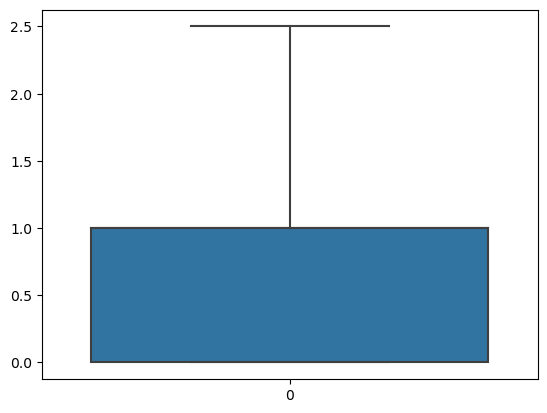

In [85]:
sns.boxplot(df['blk'])

<Axes: >

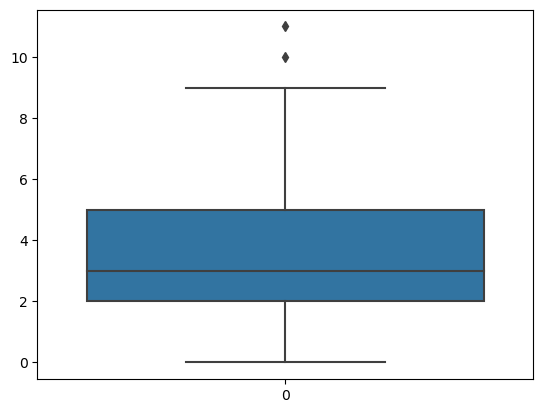

In [86]:
sns.boxplot(df['tov'])

In [87]:
q1 = df['tov'].quantile(0.25)
q2 = df['tov'].quantile(0.50)
q3 = df['tov'].quantile(0.75)

IQR = q3 - q1
med = df['tov'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR


print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


2.0
3.0
5.0
3.0
9.5
-2.5


In [88]:
df['tov'].loc[df['tov'] > upper_tail]

144     10
1107    11
Name: tov, dtype: int64

In [89]:
df['tov'].loc[df['tov'] > upper_tail] = upper_tail

In [90]:
df['tov'].loc[df['tov'] > upper_tail]

Series([], Name: tov, dtype: float64)

<Axes: >

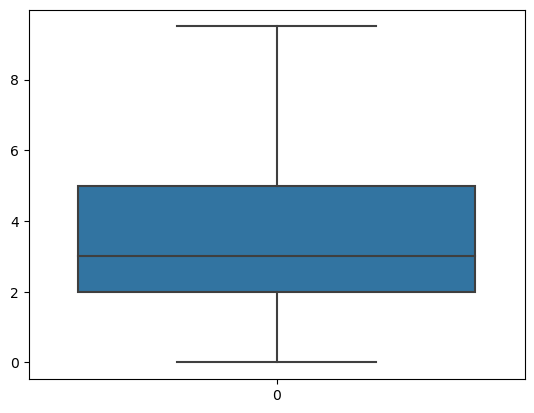

In [91]:
sns.boxplot(df['tov'])

<Axes: >

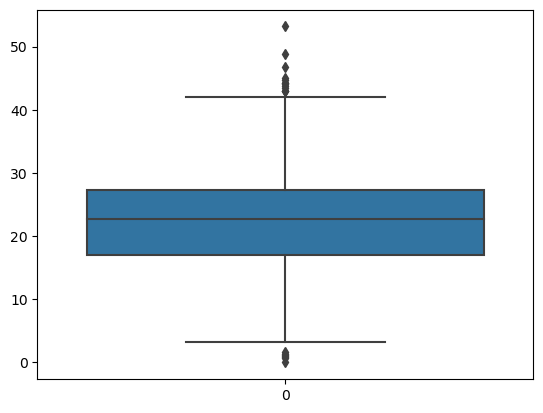

In [69]:
sns.boxplot(df['game_score'])

In [70]:
q1 = df['game_score'].quantile(0.25)
q2 = df['game_score'].quantile(0.50)
q3 = df['game_score'].quantile(0.75)

IQR = q3 - q1
med = df['game_score'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5* IQR

ga
print(q1)
print(q2)
print(q3)
print(med)

print(upper_tail)
print(lower_tail)


17.0
22.6
27.2
22.6
42.5
1.700000000000001


In [71]:
df['game_score'].loc[df['game_score'] > upper_tail]

140     42.9
177     42.9
230     43.8
348     45.0
370     44.0
438     42.9
455     43.4
505     44.7
594     46.7
743     44.2
819     48.8
1069    53.2
1156    44.3
Name: game_score, dtype: float64

In [72]:
df['game_score'].loc[df['game_score'] > upper_tail] = upper_tail

In [73]:
df['game_score'].loc[df['game_score'] > upper_tail]

Series([], Name: game_score, dtype: float64)

<Axes: >

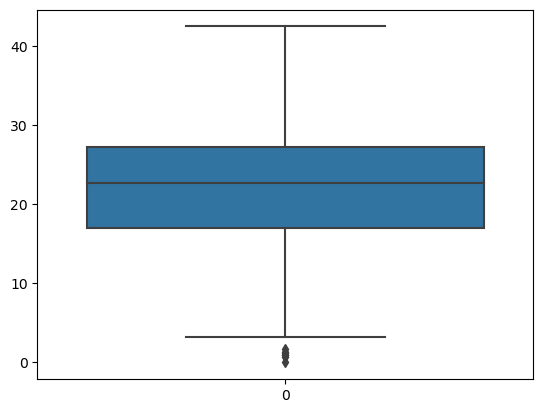

In [74]:
sns.boxplot(df['game_score'])

In [75]:
df['game_score'].loc[df['game_score'] < lower_tail]

8      0.8
15     1.1
18     0.9
49     1.2
195   -0.1
316    0.6
382    1.6
Name: game_score, dtype: float64

In [76]:
df['game_score'].loc[df['game_score'] < lower_tail] = lower_tail

In [77]:
df['game_score'].loc[df['game_score'] < lower_tail]

Series([], Name: game_score, dtype: float64)

<Axes: >

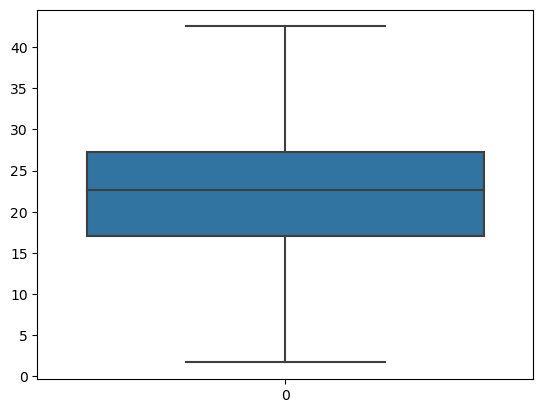

In [78]:
sns.boxplot(df['game_score'])

In [3]:
df13 = df.to_csv('lebron.csv')
df13